### 1. Import Library

Penjelasan: Pada langkah ini, kita mengimpor semua library yang diperlukan.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 2. Load Dataset

Penjelasan: Dataset diunduh dari kaggle dalam format csv dan dibaca ke dalam DataFrame. Dataset ini berisi informasi tentang pelanggan mall, termasuk ID, jenis kelamin, usia, pendapatan tahunan, dan skor belanja.

In [2]:
# Mengimpor data dari file Excel
file_path = r"C:\Users\User\Downloads\Data Mining\Clustering_K Means\Mall_Customers.csv"  # Ganti dengan path file Excel Anda
data = pd.read_csv(file_path)

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Data Cleaning

Deskripsi: Membersihkan data dengan menghapus kolom yang tidak relevan atau mengatasi nilai yang hilang.

In [4]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['CustomerID'])

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 4. Data Transformation

Deskripsi: Menyiapkan data untuk analisis dengan memilih fitur yang relevan

In [6]:
# Memilih fitur yang relevan untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

### 5. Clustering

Deskripsi: Menerapkan algoritma K-Means untuk mengelompokkan data ke dalam kelompok berdasarkan kesamaan.

In [7]:
from sklearn.cluster import KMeans

# Menerapkan K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

### 6. Evaluasi Cluster

Deskripsi: Menghitung statistik untuk setiap cluster untuk memahami karakteristik masing-masing cluster.

In [8]:
# Menghitung statistik untuk setiap cluster
# Pastikan hanya menggunakan kolom numerik
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)  # Gunakan numeric_only=True untuk memastikan hanya kolom numerik yang dihitung
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


### 6. Visualisasi

Deskripsi: Membuat visualisasi untuk memahami distribusi dan karakteristik cluster.

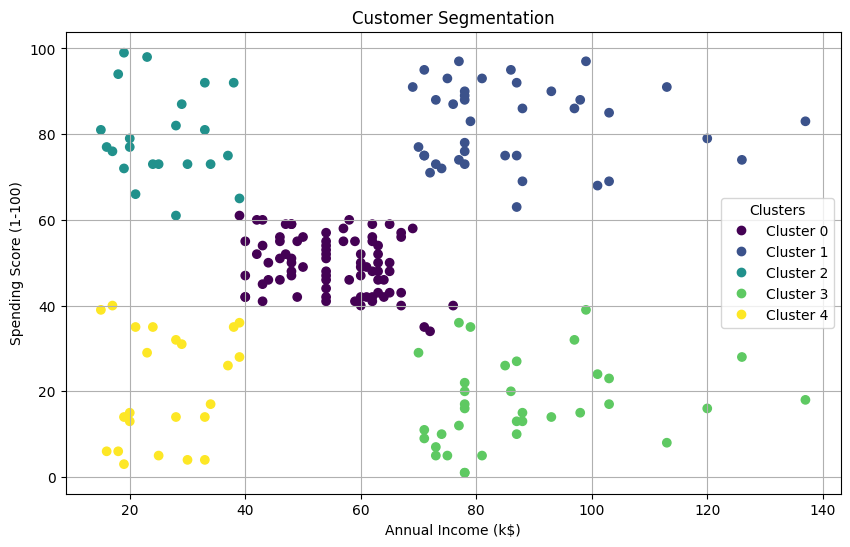

In [9]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')

# Menambahkan judul dan label
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Membuat legenda untuk menjelaskan setiap warna
legend_labels = [f'Cluster {i}' for i in range(5)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

# Menampilkan plot
plt.grid()
plt.show()

Keterangan Setiap Warna

Cluster 0: Mewakili satu kelompok pelanggan yang memiliki pendapatan tahunan dan skor belanja tertentu.

Cluster 1: Mewakili kelompok pelanggan dengan karakteristik pendapatan dan perilaku belanja yang berbeda.

Cluster 2: Menggambarkan kelompok pelanggan lainnya dengan pola pengeluaran dan pendapatan yang unik.

Cluster 3: Menunjukkan kelompok yang berbeda dalam konteks pendapatan dan pengeluaran.

Cluster 4: Menggambarkan kelompok terakhir dengan ciri khas yang membedakan mereka dari kelompok lainnya.